#### Fall 2021 | COMP 4721

# Mini-Project 1

###### Wei Chen Huang, Ian Phillips, Beatrice Cobo
---

### Task 1

In [2]:
import numpy as np
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from pandas import *
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

2.

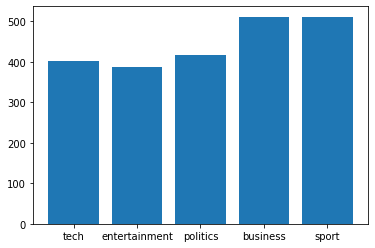

In [2]:
datadir="BBC"
categories=["tech", "entertainment", "politics", "business", "sport"]
txt_array=[];
all_array=[];
for category in categories:  # for each class
    path = os.path.join(datadir,category)  # create path to class
    for txt in os.listdir(path):  # iterate over each text file per class
        txt_array.append(txt)
    all_array.append(len(txt_array))
    txt_array=[]
fig = plt.figure()
plt.bar(categories,all_array)
fig.savefig('BBC-distribution.pdf', dpi=fig.dpi)

3.

In [3]:
corpus=load_files(container_path=datadir,encoding="latin1")

4.

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus.data)

5.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,corpus.target, test_size=0.2,random_state=None)

6.

In [6]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

7.

In [7]:
f = open('bbc-performance.txt', 'w')
f.write('---------------------------------------------------------------------------------\n')
f.write('0 - business category\n')
f.write('1 - entertainment category\n')
f.write('2 - politics category\n')
f.write('3 - sport category\n')
f.write('4 - tech category\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
matrix = confusion_matrix(y_test, predicted)
f.write(DataFrame(matrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(classification_report(y_test, predicted, target_names=corpus.target_names) + '\n')

498

(b)

In [8]:
confusion_matrix(y_test, predicted)

array([[ 94,   0,   0,   0,   2],
       [  0,  76,   1,   0,   0],
       [  1,   0,  86,   0,   0],
       [  0,   0,   0, 103,   0],
       [  0,   0,   0,   0,  82]], dtype=int64)

(c)

In [9]:
print(classification_report(y_test, predicted, target_names=corpus.target_names))

               precision    recall  f1-score   support

     business       0.99      0.98      0.98        96
entertainment       1.00      0.99      0.99        77
     politics       0.99      0.99      0.99        87
        sport       1.00      1.00      1.00       103
         tech       0.98      1.00      0.99        82

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



(d)

In [ ]:
accuracy_score(y_test, predicted)
f1_score(y_test, predicted, average='macro')
f1_score(y_test, predicted, average='weighted')